In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# 1. Input & Output (BMI)

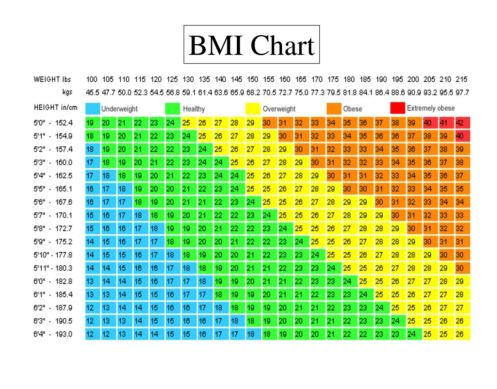

In [17]:
# show image from local file
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('./assets/healthy-bmi.webp')
# Display the image without axis
plt.axis('off')
plt.imshow(img)

Berdasarkan chart BMI tersebut, kategori BMI secara umum dapat ditentukan sebagai 
- Underweight: BMI < 18.5 
- Healthy (Normal): 18.5 <= BMI < 25 
- Overweight: 25 <= BMI < 30
- Obese: BMI > 30

Dengan data tersebut, kita dapat mendesain membership function berbasis linear seperti berikut:

| Kategori    | Tipe      | Titik-titik         |
| ----------- | --------- | ------------------- |
| Underweight | Trapezoid | \[10, 10, 16, 18.5] |
| Healthy     | Trapezoid | \[18, 19, 24, 25]   |
| Overweight  | Trapezoid | \[24.5, 26, 29, 30] |
| Obese       | Trapezoid | \[29.5, 31, 40] |



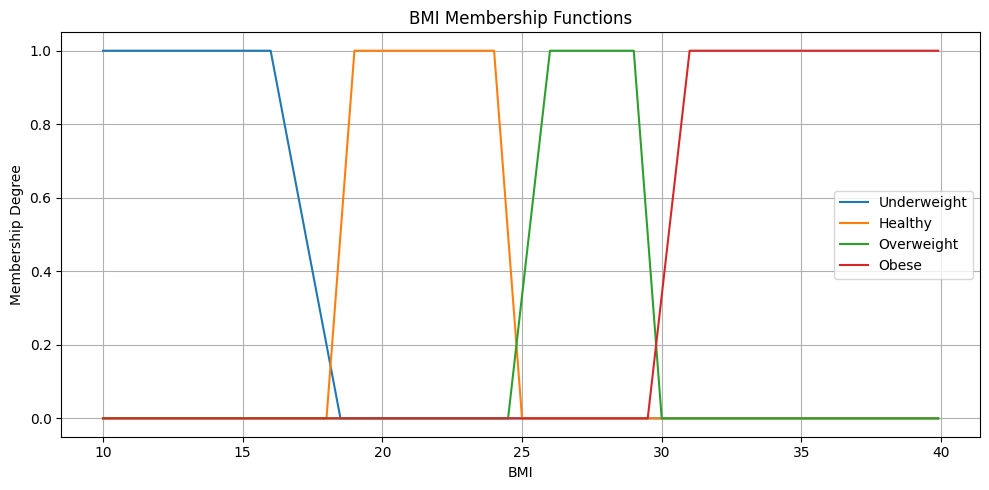

In [19]:
bmi_range = np.arange(10, 40, 0.1) # 10 to 45 as universe of discourse for BMI

underweight = fuzz.trapmf(bmi_range, [10, 10, 16, 18.5])
healthy = fuzz.trapmf(bmi_range, [18, 19, 24, 25])
overweight = fuzz.trapmf(bmi_range, [24.5, 26, 29, 30])
obese = fuzz.trapmf(bmi_range, [29.5, 31, 40, 40])

plt.figure(figsize=(10, 5))
plt.plot(bmi_range, underweight, label='Underweight')
plt.plot(bmi_range, healthy, label='Healthy')
plt.plot(bmi_range, overweight, label='Overweight')
plt.plot(bmi_range, obese, label='Obese')
plt.title('BMI Membership Functions')
plt.xlabel('BMI')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Input & Output (BodyFat - Women)

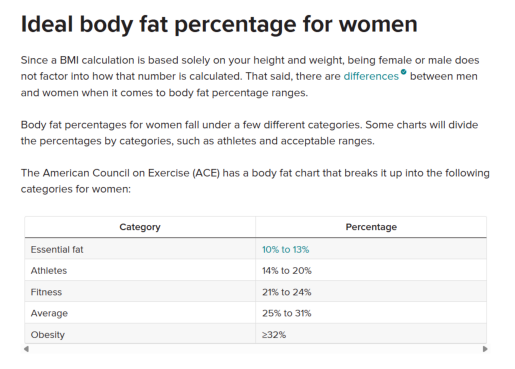

In [18]:
img = mpimg.imread('./assets/bf-women.png')
# Display the image without axis
plt.axis('off')
plt.imshow(img)

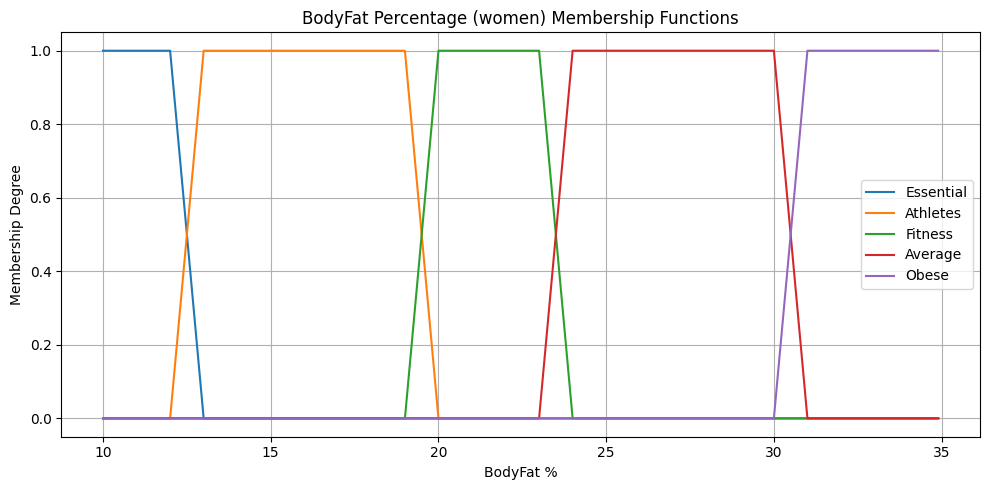

In [50]:
bodyfat_range = np.arange(10, 35, 0.1) # 10 to 35 as universe of discourse for bodyfat

essential = fuzz.trapmf(bodyfat_range, [10, 10, 12, 13])
athletes = fuzz.trapmf(bodyfat_range, [12, 13, 19, 20])
fitness = fuzz.trapmf(bodyfat_range, [19, 20, 23, 24])
average = fuzz.trapmf(bodyfat_range, [23, 24, 30, 31])
obese = fuzz.trapmf(bodyfat_range, [30, 31, 35, 35])

plt.figure(figsize=(10, 5))
plt.plot(bodyfat_range, essential, label='Essential')
plt.plot(bodyfat_range, athletes, label='Athletes')
plt.plot(bodyfat_range, fitness, label='Fitness')
plt.plot(bodyfat_range, average, label='Average')
plt.plot(bodyfat_range, obese, label='Obese')
plt.title('BodyFat Percentage (women) Membership Functions')
plt.xlabel('BodyFat %')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Input & Output (BodyFat - Men)

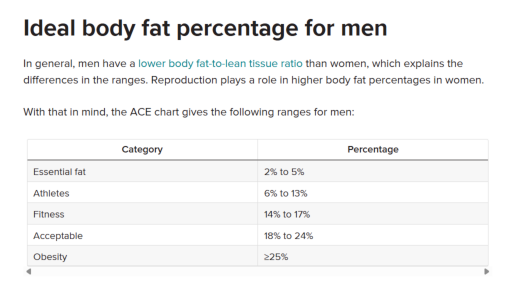

In [29]:
img = mpimg.imread('./assets/bf-men.png')
# Display the image without axis
plt.axis('off')
plt.imshow(img)

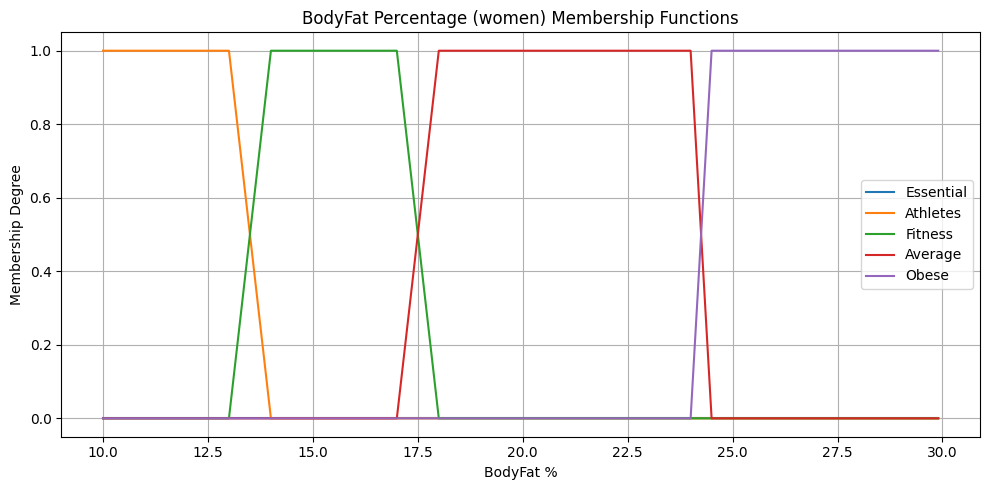

In [51]:
bodyfat_range = np.arange(10, 30, 0.1) # 10 to 35 as universe of discourse for bodyfat

essential = fuzz.trapmf(bodyfat_range, [2, 2, 5, 6])
athletes = fuzz.trapmf(bodyfat_range, [5, 6, 13, 14])
fitness = fuzz.trapmf(bodyfat_range, [13, 14, 17, 18])
average = fuzz.trapmf(bodyfat_range, [17, 18, 24, 24.5])
obese = fuzz.trapmf(bodyfat_range, [24, 24.5, 30, 30])

plt.figure(figsize=(10, 5))
plt.plot(bodyfat_range, essential, label='Essential')
plt.plot(bodyfat_range, athletes, label='Athletes')
plt.plot(bodyfat_range, fitness, label='Fitness')
plt.plot(bodyfat_range, average, label='Average')
plt.plot(bodyfat_range, obese, label='Obese')
plt.title('BodyFat Percentage (women) Membership Functions')
plt.xlabel('BodyFat %')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()